Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator 

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

1.0

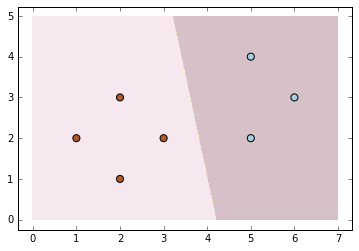

In [4]:
# Vaš kôd ovdje...
model = RidgeClassifier(alpha=0.0,copy_X=True)
model.fit(seven_X,seven_y)
h_1 = model.predict
mlutils.plot_2d_clf_problem(seven_X,seven_y, h = h_1)

accuracy_score(seven_y,h_1(seven_X))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


1.0

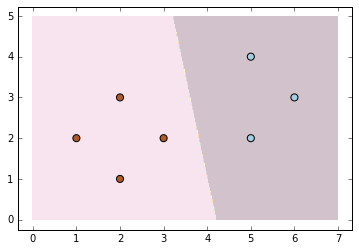

In [5]:
# Vaš kôd ovdje...
model = LinearRegression(copy_X=True)
model.fit(seven_X,seven_y)
h_1 = lambda x : model.predict(x) >= 0
correct_preds = lambda x: -1 if x ==0 else x
predictions = map(correct_preds,map(int,h_1(seven_X)))
mlutils.plot_2d_clf_problem(seven_X,seven_y, h = h_1)
accuracy_score(seven_y,predictions)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

0.875

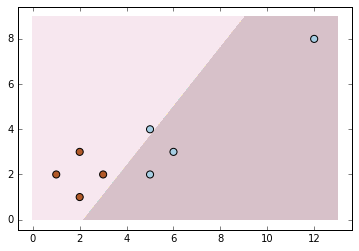

In [7]:
# Vaš kôd ovdje...
model = RidgeClassifier(alpha=0.0,copy_X=True)
model.fit(outlier_X,outlier_y)
h_1b = model.predict
mlutils.plot_2d_clf_problem(outlier_X,outlier_y, h = h_1b)

accuracy_score(outlier_y,h_1b(outlier_X))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

0.875

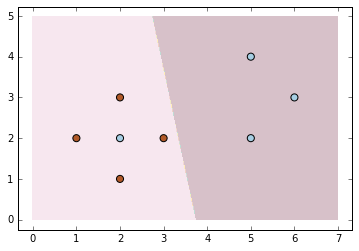

In [9]:
# Vaš kôd ovdje...
model = RidgeClassifier(alpha=0.0,copy_X=True)
model.fit(unsep_X,unsep_y)
h_1c = model.predict
mlutils.plot_2d_clf_problem(unsep_X,unsep_y, h = h_1c)

accuracy_score(unsep_y,h_1c(unsep_X))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

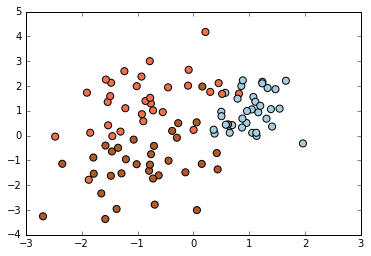

In [11]:
# Vaš kôd ovdje...
X_2, y_2 = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(X_2,y_2)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

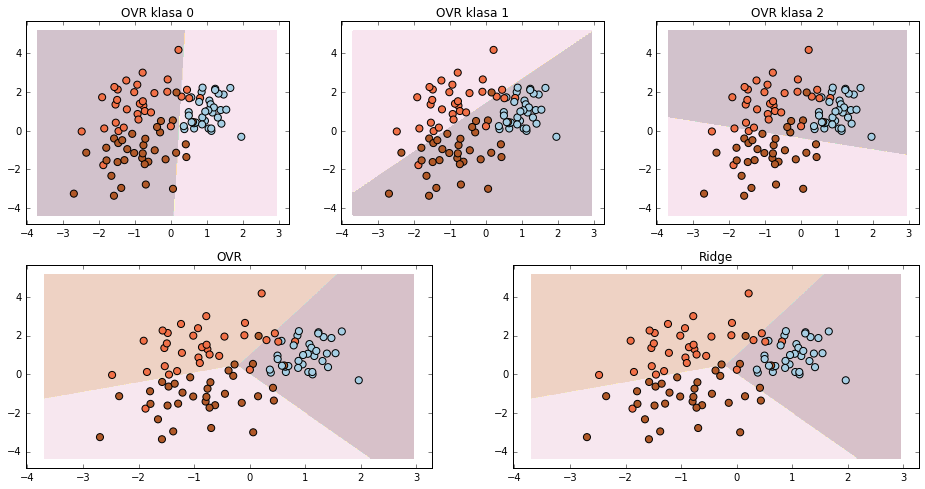

In [12]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) # podešavanje veličine glavnog okvira

OVR_predictors = []
Klase = [0,1,2]
correct_preds = lambda x: 1 if x ==k else 0
for k in Klase:
    model = LinearRegression(copy_X=True)
    y2_fixed = map(correct_preds,y_2) #1 ako je tocna klasa, 0 za ostale
    model.fit(X_2, y2_fixed)
    h_current = lambda x : model.predict(x) >= 0.5
    OVR_predictors.append(model.predict)
    subplot(2,3,k+1)
    plt.title("OVR klasa %d" %(k))
    mlutils.plot_2d_clf_problem(X_2,y_2, h = h_current)

def predict_class_index(x):
    h = [OVR_predictors[i](x) for i in range(len(OVR_predictors))]
    return argmax(h, axis=0)

subplot(2,2,3)
mlutils.plot_2d_clf_problem(X_2,y_2, h = predict_class_index)
plt.title("OVR")

subplot(2,2,4)
model = RidgeClassifier(copy_X=True, alpha = 0)
model.fit(X_2,y_2)
h_2 = lambda x : model.predict(x)
mlutils.plot_2d_clf_problem(X_2,y_2, h = h_2)
plt.title("Ridge")
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [13]:
def sigm(x,alpha):
    # Vaš kôd ovdje...
    return 1.0 / (1 + sp.exp(-xs*alpha))

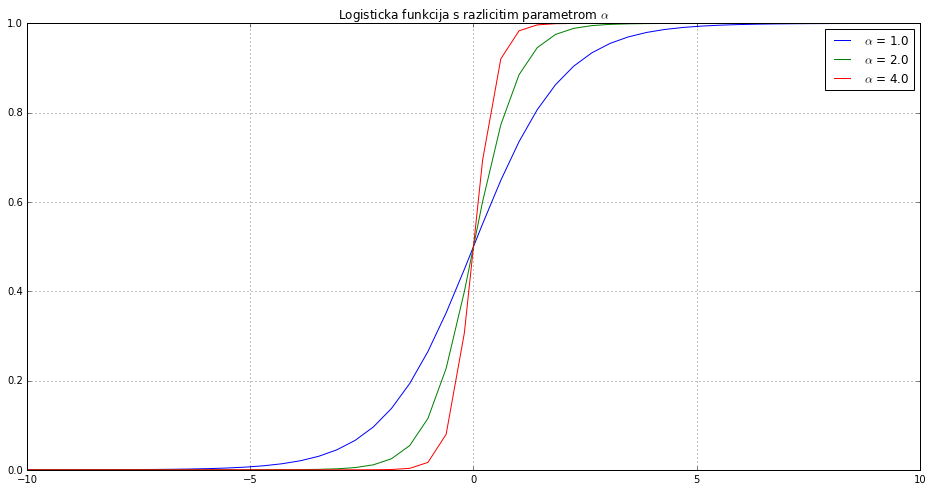

In [14]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8))
xs = sp.linspace(-10,10)
for alpha in [1,2,4]:
    plt.plot(xs, sigm(xs,alpha), label="$\\alpha$ = %2.1f" %(alpha));
plt.title('Logisticka funkcija s razlicitim parametrom $\\alpha$')
plt.legend()
plt.grid()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

def sigma(xs, alpha): 
    return 1 / (1 + sp.exp(-xs*alpha))

def lr_h(x,w,alpha=1):
    if x.ndim == 1:
        Phi = PolynomialFeatures(1).fit_transform([x])
    else:
        Phi = PolynomialFeatures(1).fit_transform(x)
    return sigma(Phi.dot(w), alpha)

def cross_entropy_loss(h, y):
    return -y * sp.log(h) - (1 - y) * sp.log(1 - h)

def error(X,w,Y): 
    return 1./len(X) * sum(cross_entropy_loss(lr_h(x,w), y) for x,y in zip(X,Y))

In [16]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, verbose = True, print_every = 50):
    w0 = np.array([0])
    w_rest = np.array(zeros(size(X,1)))
    w = np.array(zeros(size(X,1) + 1))
    w_iter = []
    error_last_iter = np.inf
    for i in range(max_iter): 
        dw0 = np.array([0])
        dw_rest = np.array(zeros(size(X,1)))
        for ix, x in enumerate(X):
            h = lr_h(x,w)
            dw0 = dw0 + h - y[ix]
            dw_rest = dw_rest + ((h-y[ix]) * x)
        w0 = w0 - eta*dw0
        w_rest = w_rest * (1 - (eta*alpha)) - eta*dw_rest
        w = np.hstack((w0, w_rest))
        
        if trace:
            w_iter.append(w)
            
        current_error = error(X, w, y)
        
        if ((abs(error_last_iter - current_error) <= epsilon)): 
            print "Condition is met and difference between errors is less or equal than %f" %(epsilon)
            print "Learning stopped at %dth iteration" %(i)
            break 
        error_last_iter = current_error
        
        if verbose and i%print_every==0:
            print "Iteration i = %d, Last error = %f and current error = %f" %(i, error_last_iter, current_error)
        
    if trace: 
        return np.array(w_iter)
    else: 
        return w

In [17]:
# Vaš kôd ovdje...
fixed_labels = map(lambda x: 0 if x==-1 else x,seven_y)
w = lr_train(seven_X, fixed_labels, trace=False)
print
print 'Dobiveni parametri modela koristeci logisticku regresiju: %s' % (w)

Iteration i = 0, Last error = 0.672836 and current error = 0.672836
Iteration i = 50, Last error = 0.472127 and current error = 0.472127
Iteration i = 100, Last error = 0.393207 and current error = 0.393207
Iteration i = 150, Last error = 0.346575 and current error = 0.346575
Iteration i = 200, Last error = 0.313079 and current error = 0.313079
Iteration i = 250, Last error = 0.286640 and current error = 0.286640
Iteration i = 300, Last error = 0.264747 and current error = 0.264747
Iteration i = 350, Last error = 0.246128 and current error = 0.246128
Iteration i = 400, Last error = 0.230029 and current error = 0.230029
Iteration i = 450, Last error = 0.215944 and current error = 0.215944
Iteration i = 500, Last error = 0.203513 and current error = 0.203513
Iteration i = 550, Last error = 0.192461 and current error = 0.192461
Iteration i = 600, Last error = 0.182574 and current error = 0.182574
Iteration i = 650, Last error = 0.173680 and current error = 0.173680
Iteration i = 700, Last

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [18]:
# Vaš kôd ovdje...
from sklearn.metrics import log_loss # funkcija za izracunavanje log gubitka unakrsne entropije

def cross_entropy_error(X,y,w):
    return log_loss(y, lr_h(X,w))

fixed_labels = np.array(map(lambda x: 0 if x==-1 else x,seven_y))
print "Cross entropy error is %f" % (cross_entropy_error(seven_X,fixed_labels,w))

Cross entropy error is 0.135219


#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

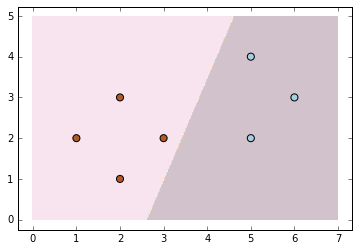

In [19]:
# Vaš kôd ovdje...
h_test = lambda x: lr_h(x,w)>0.5
mlutils.plot_2d_clf_problem(seven_X, fixed_labels, h_test)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [20]:
from sklearn.metrics import zero_one_loss

Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 946th iteration


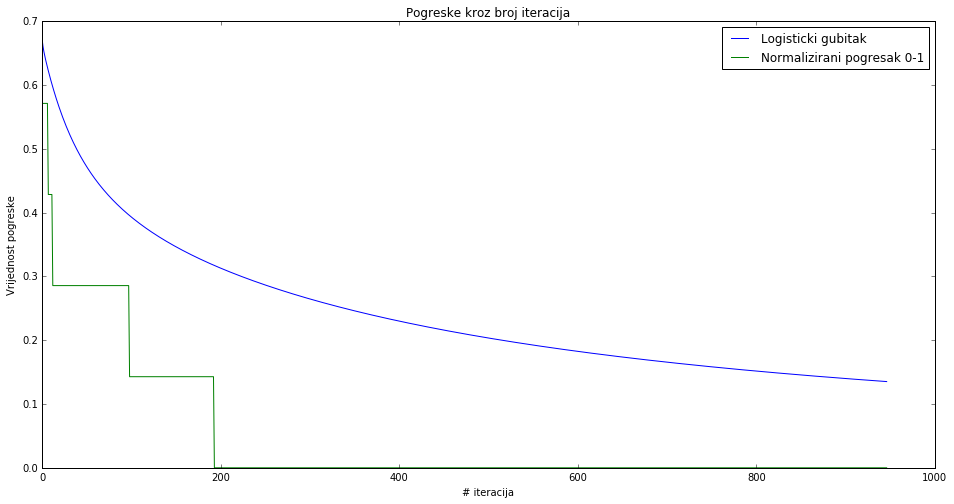

In [21]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8))
h = lambda x: 1 if x >= 0.5 else 0
fixed_labels = map(lambda x: 0 if x==-1 else x,seven_y)
w_iter = lr_train(seven_X, fixed_labels, trace=True, max_iter=4000,verbose=False)
error_w_iteration = []
zero_one_w_iteration = []
for iteration_w in w_iter:
    error_w_iteration.append(cross_entropy_error(seven_X,fixed_labels,iteration_w))
    zero_one_w_iteration.append(zero_one_loss(fixed_labels, map(h,lr_h(seven_X,iteration_w))))
plt.plot(error_w_iteration, label='Logisticki gubitak')
plt.plot(zero_one_w_iteration, label='Normalizirani pogresak 0-1')
plt.xlabel('# iteracija')
plt.ylabel('Vrijednost pogreske')
plt.title('Pogreske kroz broj iteracija')
plt.legend()
plt.show()

Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 1141th iteration
Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 946th iteration
Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 510th iteration
Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 377th iteration
Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 247th iteration


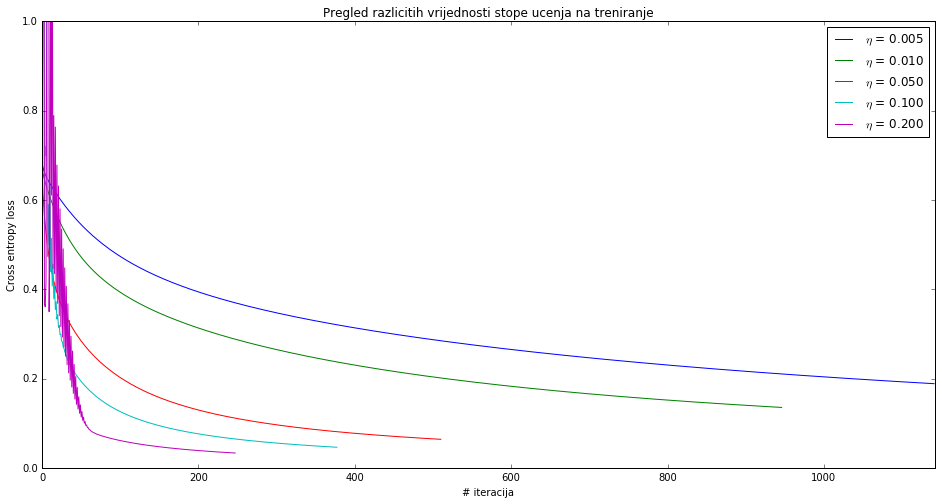

In [22]:
plt.figure(figsize=(16,8)) 
fixed_labels = map(lambda x: 0 if x==-1 else x,seven_y)
xlim = 0
for eta in [0.005, 0.01, 0.05, 0.1, 0.2]:
    w_iter = lr_train(seven_X, fixed_labels, trace=True, max_iter=5000, eta=eta,verbose=False)
    error_niz = []
    if len(w_iter) > xlim:
        xlim = len(w_iter)
    for iteration_w in w_iter:
        error_niz.append(cross_entropy_error(seven_X,fixed_labels,iteration_w))
    plt.plot(error_niz, label='$\eta$ = %2.3f' %(eta))
    
plt.xlabel('# iteracija')
plt.ylabel('Cross entropy loss')
plt.title('Pregled razlicitih vrijednosti stope ucenja na treniranje')
plt.legend()
plt.xlim(0,xlim)
plt.ylim(0,1.0)
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 946th iteration


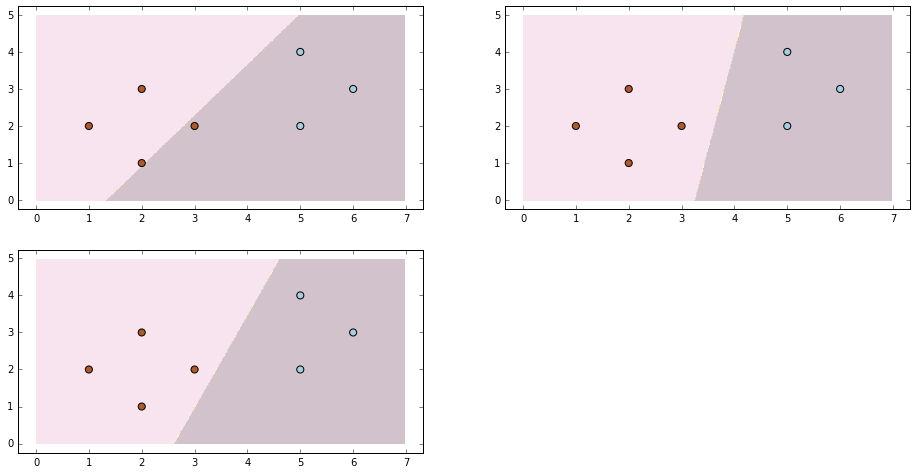

In [23]:
# Vaš kôd ovdje...
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(16,8)) # podešavanje veličine glavnog okvira

fixed_labels = map(lambda x: 0 if x==-1 else x,seven_y)

subplot(2,2,1)
model = LogisticRegression()
model.fit(seven_X,fixed_labels)
h_1f = lambda x : model.predict(x)
mlutils.plot_2d_clf_problem(seven_X,fixed_labels, h = h_1f)

subplot(2,2,2)
model = LogisticRegression(solver='liblinear', max_iter=2000, tol=0.0001, C=55)
model.fit(seven_X,fixed_labels)
h_1f = lambda x : model.predict(x)
mlutils.plot_2d_clf_problem(seven_X,fixed_labels, h = h_1f)

subplot(2,2,3)
w = lr_train(seven_X, fixed_labels, verbose = False)
h_my = lambda x: lr_h(x,w) >= 0.5
mlutils.plot_2d_clf_problem(seven_X,fixed_labels, h = h_my)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

Condition is met and difference between errors is less or equal than 0.000100
Learning stopped at 842th iteration


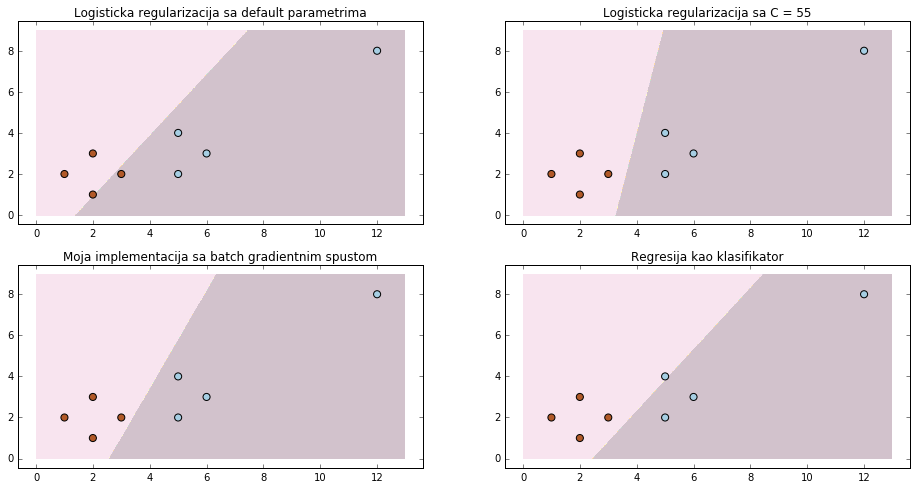

In [24]:
# Vaš kôd ovdje...
from sklearn.linear_model import LogisticRegression, RidgeClassifier

plt.figure(figsize=(16,8)) # podešavanje veličine glavnog okvira

fixed_labels = map(lambda x: 0 if x==-1 else x,outlier_y)

subplot(2,2,1)
model = LogisticRegression()
model.fit(outlier_X,fixed_labels)
h_1f = lambda x : model.predict(x)
mlutils.plot_2d_clf_problem(outlier_X,fixed_labels, h = h_1f)
plt.title("Logisticka regularizacija sa default parametrima")

subplot(2,2,2)
model = LogisticRegression(solver='liblinear', max_iter=2000, tol=0.0001, C=55)
model.fit(outlier_X,fixed_labels)
h_1f = lambda x : model.predict(x)
mlutils.plot_2d_clf_problem(outlier_X,fixed_labels, h = h_1f)
plt.title("Logisticka regularizacija sa C = 55")

subplot(2,2,3)
w = lr_train(outlier_X, fixed_labels, verbose = False)
h_my = lambda x: lr_h(x,w) >= 0.5
mlutils.plot_2d_clf_problem(outlier_X,fixed_labels, h = h_my)
plt.title("Moja implementacija sa batch gradientnim spustom")

subplot(2,2,4)
model = RidgeClassifier()
model.fit(outlier_X,fixed_labels)
h_1f = lambda x : model.predict(x)
mlutils.plot_2d_clf_problem(outlier_X,fixed_labels, h = h_1f)
plt.title("Regresija kao klasifikator")

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


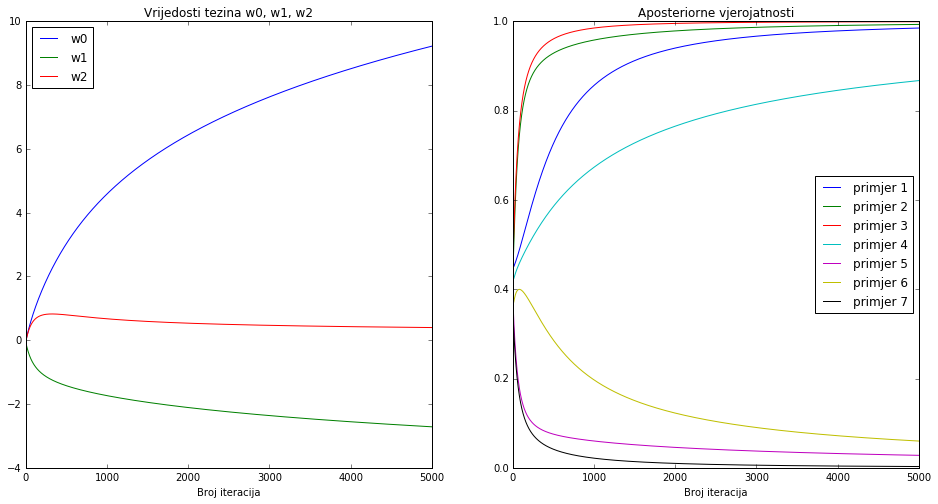

In [34]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) 
fixed_labels = map(lambda x: 0 if x==-1 else x,seven_y)
w_iter = lr_train(seven_X, fixed_labels, epsilon=0.000000001, trace=True, max_iter=5000, verbose=False)

h_rez = []
for wi in w_iter: 
    h_rez.append(np.array(lr_h(seven_X,wi)))
h_rez = np.array(h_rez)

ax1 = subplot(1,2,1)
for i in range(3):
    plt.plot(w_iter[:,i], label="w%d" %(i))
ax1.set_title('Vrijedosti tezina w0, w1, w2')
ax1.set_xlabel('Broj iteracija')
plt.legend(loc="best")

ax2 = subplot(1,2,2)
for i in range(size(seven_X,0)):
    plt.plot(h_rez[:,i], label="primjer %d" %(i+1))
ax2.set_title('Aposteriorne vjerojatnosti')
ax2.set_xlabel('Broj iteracija')
plt.legend(loc="best")

plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

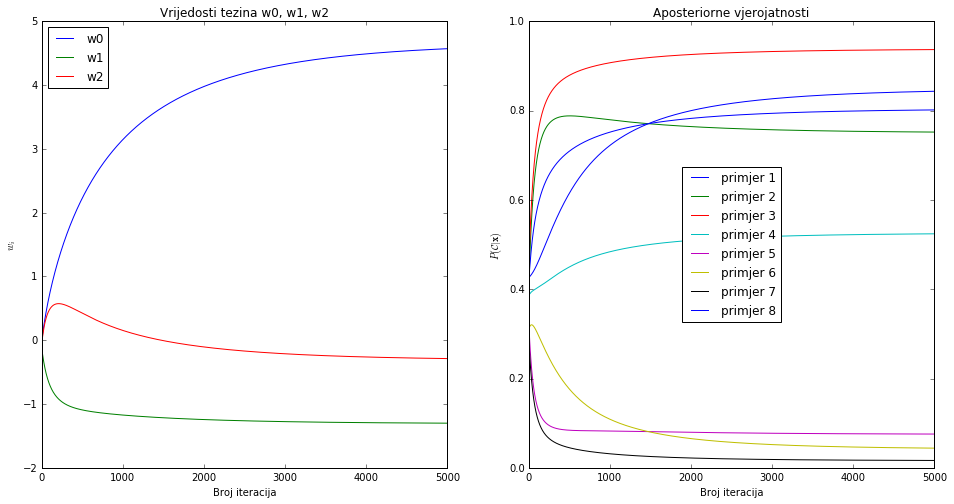

In [26]:
# Vaš kôd ovdje...
plt.figure(figsize=(16,8)) 
fixed_labels = map(lambda x: 0 if x==-1 else x,unsep_y)
w_iter = lr_train(unsep_X, fixed_labels, epsilon=0.000000001, trace=True, max_iter=5000, verbose=False)

h_rez = []
for wi in w_iter: 
    h_rez.append(np.array(lr_h(unsep_X,wi)))
h_rez = np.array(h_rez)

ax1 = subplot(1,2,1)
for i in range(3):
    plt.plot(w_iter[:,i], label="w%d" %(i))
ax1.set_title('Vrijedosti tezina w0, w1, w2')
ax1.set_xlabel('Broj iteracija')
ax1.set_ylabel('$w_i$')
plt.legend(loc="best")

ax2 = subplot(1,2,2)
for i in range(size(unsep_X,0)):
    plt.plot(h_rez[:,i], label="primjer %d" %(i+1))
ax2.set_title('Aposteriorne vjerojatnosti')
ax2.set_xlabel('Broj iteracija')
ax2.set_ylabel('$P(\mathcal{C}|\mathbf{x})$')
plt.legend(loc="best")

plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

Condition is met and difference between errors is less or equal than 0.000010
Learning stopped at 841th iteration
Condition is met and difference between errors is less or equal than 0.000010
Learning stopped at 254th iteration


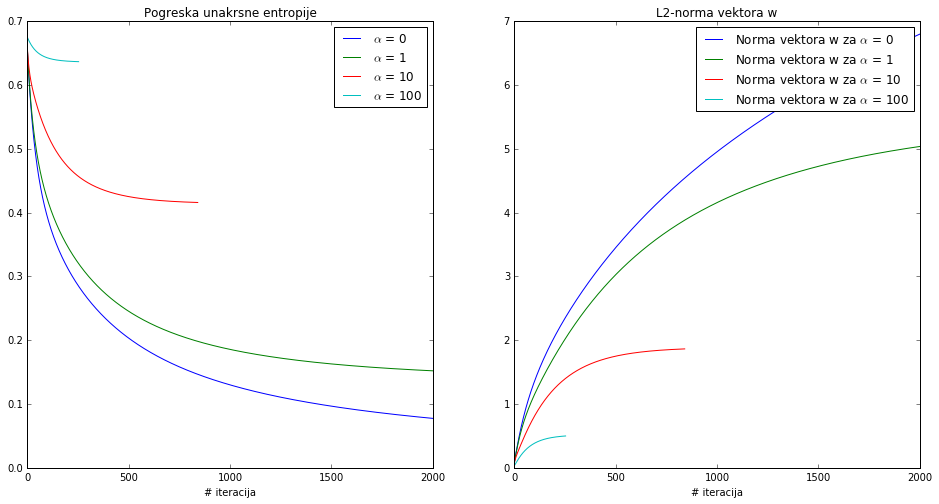

In [62]:
# Vaš kôd ovdje...
h_my = lambda x: lr_h(x,w) >= 0.5
fixed_labels = map(lambda x: 0 if x==-1 else x,seven_y)
plt.figure(figsize=(16,8)) 

ax1 = subplot(1,2,1)
ax2 = subplot(1,2,2)
for alpha in [0, 1, 10, 100]:
    w_iter = lr_train(seven_X, fixed_labels, trace=True,epsilon=0.00001, alpha=alpha,verbose=False) # treniranje modela
    error_niz = []
    w_norm = []
    for wi in w_iter:
        error_niz.append(cross_entropy_error(seven_X,fixed_labels,wi))
        w_norm.append(norm(wi,2))
    ax1.plot(error_niz, label='$\\alpha$ = %d' %(alpha))
    ax2.plot(w_norm, label='Norma vektora w za $\\alpha$ = %d' %(alpha))
ax1.set_title('Pogreska unakrsne entropije')
ax1.legend()
ax1.set_xlabel('# iteracija')
ax2.set_title('L2-norma vektora w')
ax2.legend()
ax2.set_xlabel('# iteracija')
    
plt.show()

Training for alpha = 0.00
Training for alpha = 1.00
Training for alpha = 10.00
Condition is met and difference between errors is less or equal than 0.000010
Learning stopped at 841th iteration
Training for alpha = 100.00
Condition is met and difference between errors is less or equal than 0.000010
Learning stopped at 254th iteration


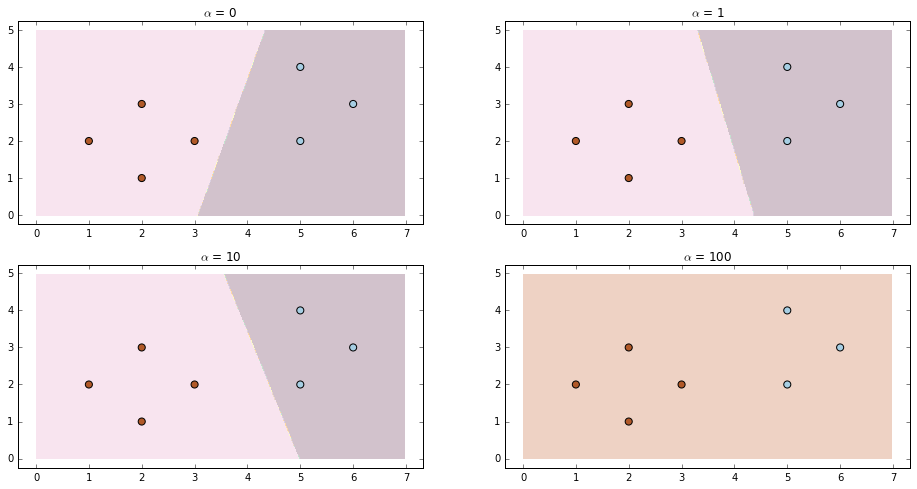

In [28]:
plt.figure(figsize=(16,8)) 
i = 0
for alpha in [0, 1, 10, 100]:
    i = i+1
    print "Training for alpha = %.2f" %(alpha)
    w_iter = lr_train(seven_X, fixed_labels, trace=True,epsilon=0.00001, alpha=alpha, verbose=False) # treniranje modela
    w=w_iter[-1]
    subplot(2,2,i)
    mlutils.plot_2d_clf_problem(seven_X, fixed_labels, h=h_my)
    plt.title('$\\alpha$ = %d' %(alpha))
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

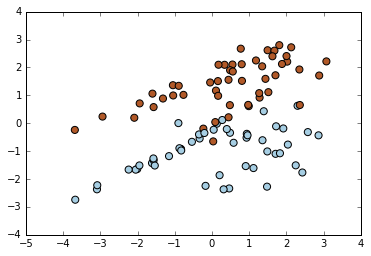

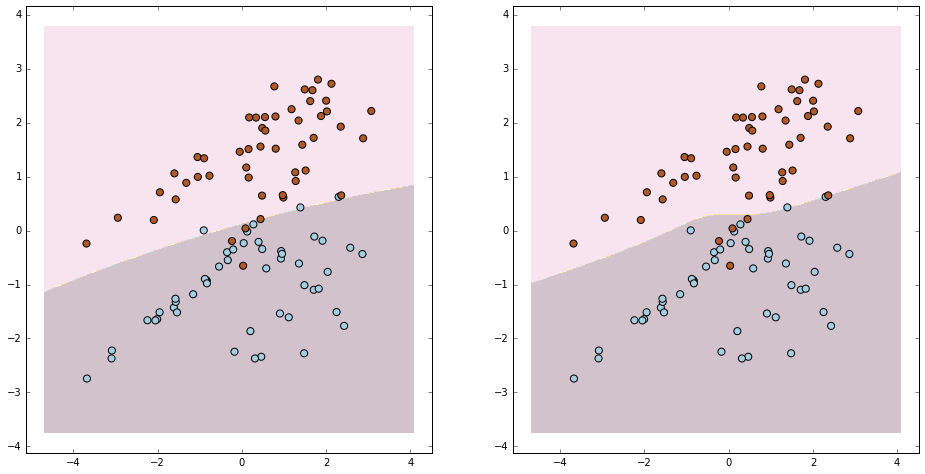

In [58]:
# Vaš kôd ovdje...
X_gen, y_gen = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_gen,y_gen) 
model = LogisticRegression()

plt.figure(figsize=(16,8)) 

subplot(1,2,1)
poly = PolynomialFeatures(2)
Phi6 = poly.fit_transform(X_gen)
model.fit(Phi6,y_gen)
mlutils.plot_2d_clf_problem(X_gen, y_gen, lambda x : model.predict(poly.transform(x)))

subplot(1,2,2)
poly = PolynomialFeatures(3)
Phi6 = poly.fit_transform(X_gen)
model.fit(Phi6,y_gen)
mlutils.plot_2d_clf_problem(X_gen, y_gen, lambda x : model.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

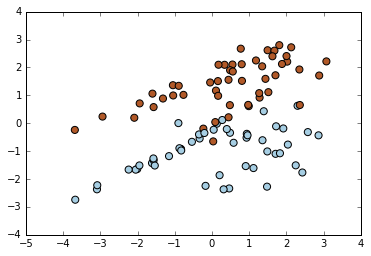

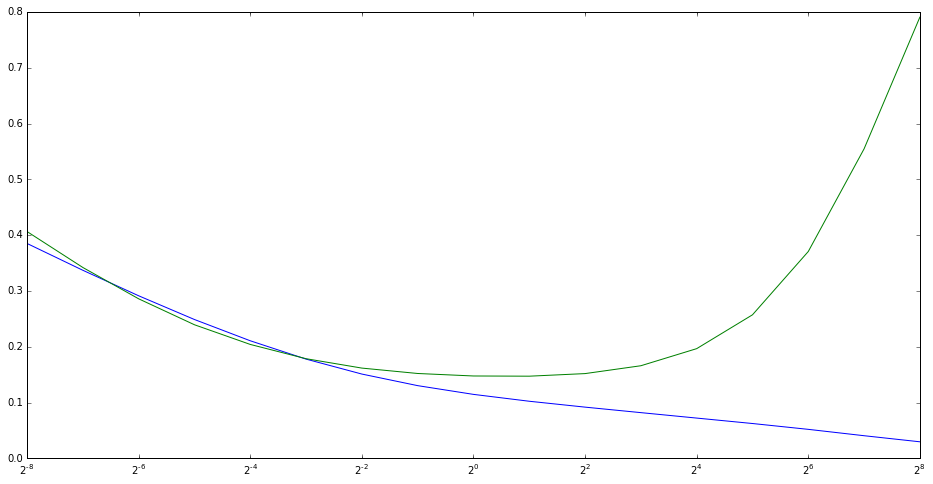

In [59]:
# Vaš kôd ovdje...
from sklearn.cross_validation import train_test_split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_gen, y_gen, test_size=0.3,stratify= y_gen)
mlutils.plot_2d_clf_problem(X_gen,y_gen) 
plt.figure(figsize=(16,8))
emp_pog = []
pog_gen = []
poly = PolynomialFeatures(4)
for alpha in range(-8,9):
    C = 2.0 ** (alpha)
    model = LogisticRegression(C=C)
    X6 = poly.fit_transform(X_gen_train)
    model.fit(X6, y_gen_train)
    emp_pog.append(log_loss(y_gen_train, model.predict_proba(poly.fit_transform(X_gen_train))))
    pog_gen.append(log_loss(y_gen_test, model.predict_proba(poly.fit_transform(X_gen_test))))
plt.xscale('log', basex=2)
plt.plot(2.0 ** np.array(range(-8,9)), emp_pog)
plt.plot(2.0 ** np.array(range(-8,9)), pog_gen)
plt.show()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?